<p>
<img src="https://drive.google.com/uc?export=view&id=11V3n1rpH6yrleTIJcS5Y01QblGW7DiZ4" style="float: center"/>
</p>

In [82]:
!pip install plotly
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.7 MB/s eta 0:00:00


# Vibração Livre Amortecida

A equação do movimento de um sistema massa mola de 1 Grau de Liberdade, com massa $m$, amortecimento $c$ e rigidez $k$ para descrito por $x$.

$$
m \ddot{x}(t) + c \dot{x} + k x(t) = 0
$$

<p>
<img src="https://drive.google.com/uc?export=view&id=1t831GctcB7xWBNU8ZsThdHHBB2OfbShu" style="center" width="300"/>
</p>

onde,
$ m $ é a massa $[kg]$
$ c $ é o amortecimento $[N s/m]$
$ k $ é a rigidez $[N/m]$

ou ainda,

$$
\ddot{u}(t) + 2 \xi \omega_n \dot{u} + \omega_n^2 u(t) = 0
$$

onde,
$\omega_n$ é a frequência natural $[rad/s]$,
$T $ é o período natural de oscilação $[s]$, ou seja $(T = 2\pi / \omega_n)$, e
$\xi $ é a razão de amortecimento $[adim]$, normalmente apresentada em porcentagem.


OBS: $f_n = \omega_n / (2\pi) [Hz]$

A solução analítica é dada pela expressão de deslocamento, para $0 \leq \xi \leq 1$,:

$$ u(t) = e^{-\xi \omega_n t} \left[ U_o \cos (\omega_d t) + \left( \frac{V_o + \xi \omega_n U_o}{\omega_d} \right) \sin (\omega_d t) \right] $$

onde,
$\omega_d = \omega_n \sqrt{1-\xi^2}$ é a frequência amortecida $[rad/s]$
$ U_o $ é o deslocamento inicial $[m]$, e
$ V_o $ é a velocidade inicial $[m/s]$.

Ou ainda,

$$ u(t) = A e^{-\xi \omega_n t} \cos (\omega_d t - \phi) $$

onde,
$A \cos \phi = U_o$ e $A \sin \phi = \frac{V_o + \xi \omega_n U_o}{\omega_d}$,

Logo,
a amplitude $$A = \sqrt{U_o^2 + \left( \frac{V_o + \xi \omega_n U_o}{\omega_d} \right)^2} $$
, e
o ângulo de fase $$\tan \phi =\left( {V_o + \xi \omega_n U_o} \right) / \left( {\omega_n U_o} \right) $$


# Exercício

Implementar uma rotina para calcular o deslocamento ${u} (t)$ e a velocidade $\dot{u}  (t)$ do sistema de 1 GDL amortecido,
<p>
<img src="https://drive.google.com/uc?export=view&id=1t831GctcB7xWBNU8ZsThdHHBB2OfbShu" style="float: center" width="300"/>
</p>

**Responda as Questões:**

- Leia sinal de arquivos '.csv' com o deslocamento $u (t)$ de resultado experimental, apresentada acima;

- Estime a razão de amortecimento $\xi_{estimado}$, por decaimento exponencial;

- Estime a frequência de oscilação $\omega_d$, por transformada de fourier;

- Estime a frequência natural $\omega_n$

**DICA:**

1. Utilize os comando `find_peaks` (**from** `scipy.signal`) para determinar a envoltoria $A e^{-\xi \omega_n t}$
2. Utilize os comando `numpy.polyfit` para determinar os coeficientes da reta
$
\log x = - \xi \omega_n t + b = a t + b
$
pelO método de mínimos quadrado.

## Importar as Bibliotecas

In [83]:
# 1GDL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

## Leitura de Dados

In [84]:
!ls

sample_data


In [85]:
import pandas as pd

# Path to the CSV file in GitHub
url = 'https://raw.githubusercontent.com/mumorais/ENM_UnB-Vibracoes_Exp/refs/heads/main/1gdl_ex_2.csv'

# Path to the CSV file in Google Colab Files
# Mas é preciso importar o arquivo csv para diretório
# Não se esqueça de inserir os arquivo
#path = '/content/1gdl_ex_2b.csv'

uvnum = pd.read_csv(url, sep = ';')
uvnum.head()

,Time,U_t,V_t
0,0.000,1.000000,0.000000
1,0.005,0.993766,-2.489225
2,0.010,0.975178,-4.936329
3,0.015,0.944523,-7.311011
4,0.020,0.902237,-9.584008


In [104]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

pio.renderers.default = 'colab'

df = pd.DataFrame({
    'Categoria': ['A', 'B', 'C'],
    'Valor': [10, 20, 30]
})

fig = px.line(uvnum, x='Time', y='U_t', title='Histórico temporal do Deslocamento u(t) do sistema 1Gdl')
fig.show()


In [106]:
# Estime a Frequência de Oscilação
# Periodo:    Dt/N
# Frequência: N/Dt ,
#            onde  N é o número de oscilações e
#                 Dt é o intervalo de tempo.



### DataFrame to Numpy.Array

In [65]:
Time = uvnum['Time'].to_numpy()
U_t  = uvnum['U_t' ].to_numpy()
V_t  = uvnum['V_t' ].to_numpy()

## Decaimento Exponencial

A solução temporal de massa-mola com amortecimento subcrítico, é dado pela expressão:

$$ x(t) = A e^{-\xi \omega_n t} \cos (\omega_d t - \phi). $$

Como a função harmonico $\cos (\omega_d t - \phi)$ é limitada em $[-1; +1]$, temos uma envoltoria entorno de $u(t)$ dada pela expressão:

$$ a(t) = A e^{-\xi \omega_n t}. $$

In [66]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(U_t, height=0.05)

Time_peaks = Time[peaks]
U_t__peaks =  U_t[peaks]

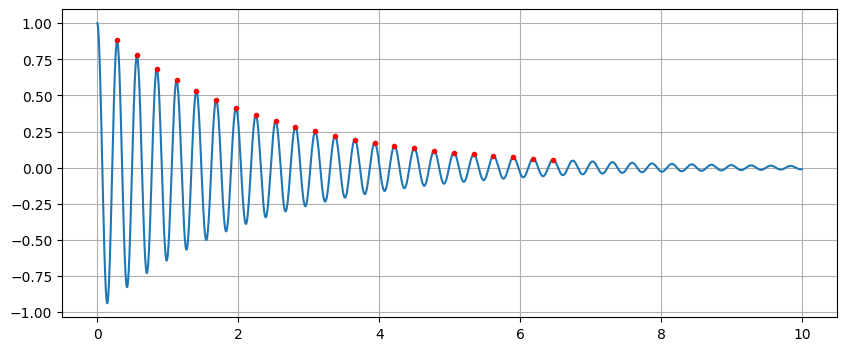

In [67]:
plt.figure(figsize=(10,4))
plt.plot(Time,U_t)
plt.plot(Time[peaks],U_t[peaks],'r.')
plt.grid()
plt.show()

Aplica-se logaritmo $\ln(...)$ em ambos os lados da epxressão da envoltoria $a(t)$ a fim de obter a expressão linear:
$$ \ln a(t) = \ln A e^{-\xi \omega_n t} = \ln A -\xi \omega_n t .$$

Temos a expressão linear do tipo $$Y = c_0 - c_1 X ,$$
onde,
as coordenadas são dadas pela expressão $Y = \ln a(t)$ e $X = t$,
e os coeficientes da equação linear são:
1. inclinação (coeficiente angular) $c_1 = \xi \omega_n$
2. constante  (coeficiente linear ) $c_0 = \ln A $


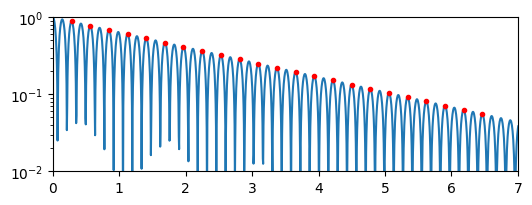

In [68]:
plt.figure(figsize=(6,2))
plt.semilogy(Time,np.abs(U_t))
plt.plot(Time[peaks],np.abs(U_t[peaks]),'r.')
plt.xlim(0,7)
plt.ylim(1e-2,1e0)
plt.show()

## Ajuste de Curva

E, aplica-se o comando `polyfit` (`from numpy`), para determinar os coeficiente $c_0$ e $c_1$ da equação linear

$$Y = c_0 - c_1 X .$$

In [69]:
polinomio = np.polyfit(Time_peaks, np.log(U_t__peaks), 1)
#logx = a t + b
coef_a = polinomio[0] #-qsi*wn
coef_b = polinomio[1] #relacionado as condições iniciais
print(polinomio)
print(np.round(coef_a,4))
print(np.round(coef_b,6))

[-0.44714676 -0.0007511 ]
-0.4471
-0.000751


In [70]:
# Plotar a reta resultante (melhor ajuste LSE)
t0 = 0.5 #tempo inicial do intervalo
tf = 6.0 #tempo final do intervalo
dt = 0.01
Time_lse = np.arange(t0,tf,dt)


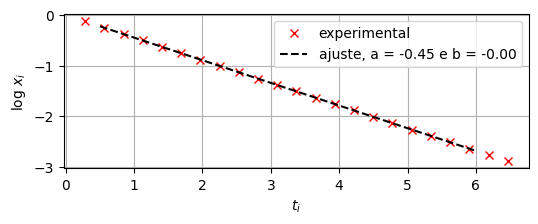

In [71]:
plt.figure(figsize=(6,2))
plt.plot(Time_peaks, np.log(U_t__peaks), 'rx', label = 'experimental')
plt.plot(Time_lse  , coef_a*Time_lse + coef_b, '--k',
         label = 'ajuste, a = %2.2f e b = %2.2f' %(coef_a, coef_b))
plt.xlabel(r'$t_i$')
plt.ylabel(r'log $x_i$')
plt.grid()
plt.legend()
plt.show()

## Determinação da Frequência de Oscilação



In [72]:
# Análise de frequência FFT
u_frq = np.fft.fft(U_t)
n = len(U_t)
nhalf = int(np.floor(n/2))
delta = Time[1] - Time[0]
frq = np.fft.fftfreq(n, d=delta)

Novamente, utilizando os comando `find_peaks` (**from** `scipy.signal`), determina-se o pico de frequência do spectro de frequência $\hat{u}$, obtido por transformada de Fourier ($\hat{u} = \mathcal{F} (u)$).

In [73]:
u_frq_max = np.max(abs(u_frq))
peaks_index, properties = find_peaks(np.abs(u_frq),height = u_frq_max/2)
print('indice pico : ',peaks_index[0])
print('freq. pico',frq[peaks_index[0]])
wd_fft = frq[peaks_index[0]]*2*np.pi

indice pico :  36
freq. pico 3.6


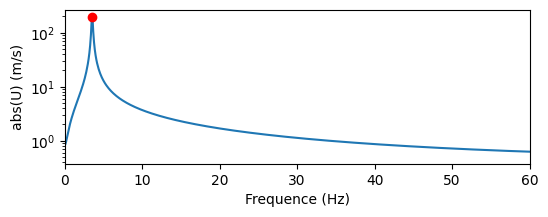

In [74]:
plt.figure(figsize=(6,2))
plt.semilogy(frq[0:nhalf-1],np.abs(u_frq[0:nhalf-1]))
plt.semilogy(frq[peaks_index[0]],np.abs(u_frq[peaks_index[0]]),'ro')
plt.xlabel('Frequence (Hz)')
plt.ylabel('abs(U) (m/s)')
plt.xlim(0,60)
plt.show()

## Estimativa da Frequência Natural

Como o frequência amortecida $\omega_d = \omega_n \sqrt{1 - \xi^2}$, elevando ao quadrado em ambos os lados a expressão temos:

$$ \omega^2_d = \omega^2_n - \left( \xi \omega_n \right)^2 $$

Ou seja,

$$ \omega_d^2 = \omega^2_n - c_1^2 $$

Logo, a frequência natural $\omega_n$ pode ser estimada por:

$$ \omega_n = \sqrt{\omega_d^2 + c_1^2}$$



In [107]:
# 1st Estimativa
# considerando wn ~ wd
wn = 2*np.pi*frq[peaks_index[0]] #aproximação wd = wn
qsi = - coef_a/wn
print(wn/2/np.pi,qsi*100) #frequencia natural, Hz & amortecimento

3.6 1.9768226961595046


In [108]:
#estimativa erro na aproximação wd por wn
wd = wn*np.sqrt(1 - qsi**2)
print(wn/2/np.pi, wd/2/np.pi, np.sqrt(1-qsi**2))

3.6 3.5992965222315627 0.9998045895087674


In [109]:
# 2st Estimativa
# considerando wn != wd
wn = np.sqrt(wd_fft**2 + coef_a**2)
qsi = - coef_a/wn
print(wn/2/np.pi,qsi*100) #frequencia natural, Hz & amortecimento


3.6007033403283555 1.9764365551773677


## Refinar a Estimação da Frequência


### Background: DFT of a Sinusoid

If your signal is a pure sinusoid:

$$ y[n] =  A \cos (2\pi f_o n T + \phi)$$

where:

* $f_o$ is a not exactly on a DFT bin;

* $T$ is the sampling interval

* $N$ is the DFT size,

then the DFT will **leak** — spreading power across several bins instead of a single one.

This spectral leakage causes the true peak to lie between two DFT bins.


### Quadratic Interpolation

Even though DFT values are sampled at discrete frequencies, the underlying spectrum of a single frequency sinusoid is smooth. The magnitude of the FFT near a peak follows a smooth curve, and if you zoom in near the peak, it resembles a parabola. So we model the magnitude near the peak using a quadratic function:

$$ y(k) = a (k-k_o)^2 + b$$

Where, $k_o$ é a localização verdadeira (localizada entre os indices inteiros), $y(k)$ é a magnitude da FFT no k-éssimo 'bin' (intervalo de frequência discreto).

We then take three points:

*   $y_{-1} = |X[k-1]|$
*   $y_{ 0}  = |X[k]|$
*   $y_{+1} = |X[k+1]|$

And fit a parabola through them to estimate the sub-bin peak location.



### Derivation of the Formula
Assume the three points lie on a parabola. The vertex of a parabola defined by 3 points, $(x_{-1},y_{-1})$, $(x_{0},y_{0})$, and $(x_{+1},y_{+1})$, can be found analytically.

Let the three points be:

$$
(-1,\alpha) = (k-1,y_{-1}), \quad
( 0,\beta ) = (  0,y_{0} ), \quad
(+1,\delta) = (k+1,y_{+1})
$$

Then, the location of the vertex relative to the center bin is:

$$ p =
\frac{1}{2} \cdot \frac{\alpha - \delta}{\alpha - 2\beta + \delta}
$$

Then the **refined peak location** is:

$$ k_{interp} = k + p $$

Convert that to frequency:

$$ f_{interp} = f[k] + p \cdot \Delta f $$


### Implementação da função `quadratic_interpolation`

In [112]:
def quadratic_interpolation(mag, k):
    # mag: magnitude spectrum
    # k: index of peak
    alpha = mag[k - 1]
    beta = mag[k]
    gamma = mag[k + 1]

    p = 0.5 * (alpha - gamma) / (alpha - 2*beta + gamma)
    return p

### Aplication for Present Problem

In [ ]:
p = quadratic_interpolation(np.abs(u_frq), peaks_index)
refined_freq = frq[peaks_index] + p * (frq[1] - frq[0])

In [113]:
display(refined_freq)

array([ 3.56935792, -3.56935792])